In [1]:
#pip install autokeras

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

In [14]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [15]:
training_data['WELL'] = training_data['WELL'].astype('category')

In [16]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000,184719.000000
mean,1107.267206,555.288869,84.581062,7.096406,2.044410,0.438939,2.444864,0.441174,2721.519760
std,350.079884,228.594505,42.316679,3.527867,7.855950,0.454943,0.151188,0.456314,802.882038
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,949.906203,431.554655,57.870251,5.000000,0.206200,0.150676,2.359800,0.151492,2072.536377
50%,1122.578917,580.037389,80.375000,6.000000,0.281600,0.394073,2.473600,0.403218,2623.108887
75%,1249.987126,677.756813,105.747952,10.000000,0.353700,0.674850,2.557300,0.687541,3210.812256
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [17]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

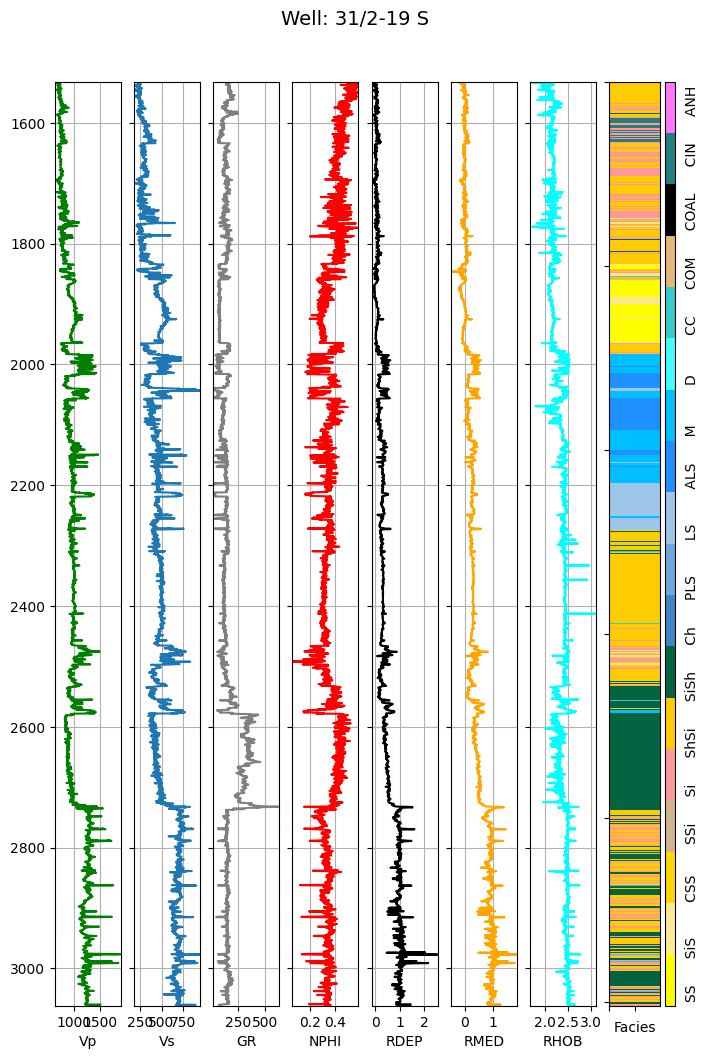

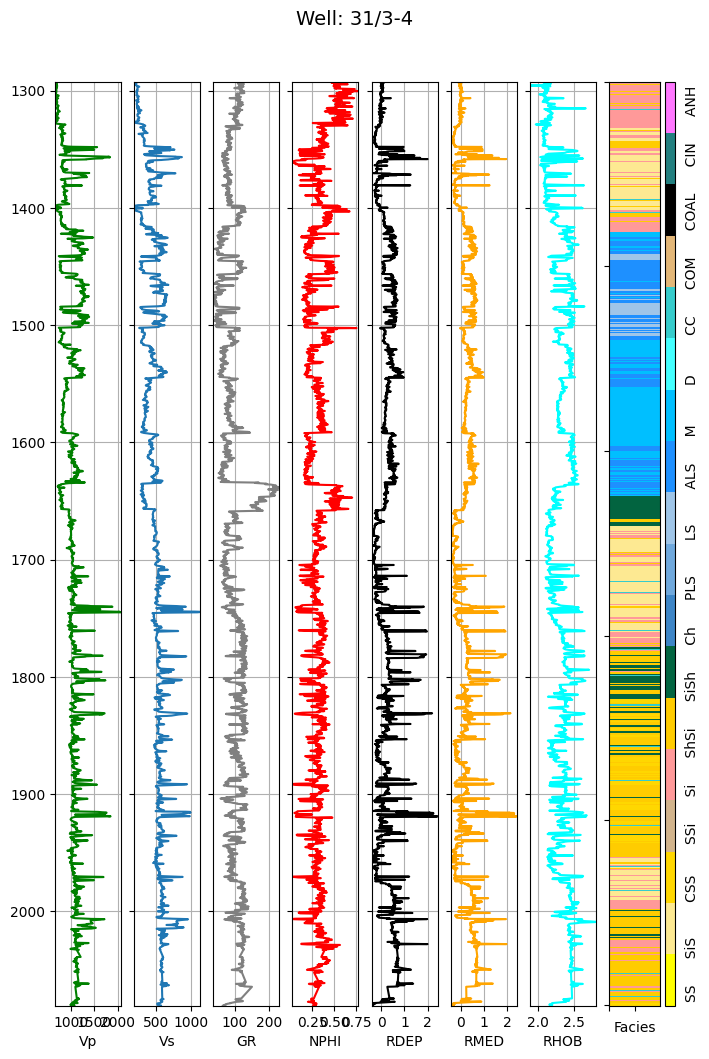

In [18]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      6174
Si      32512
ShSi    37120
SiSh    25963
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

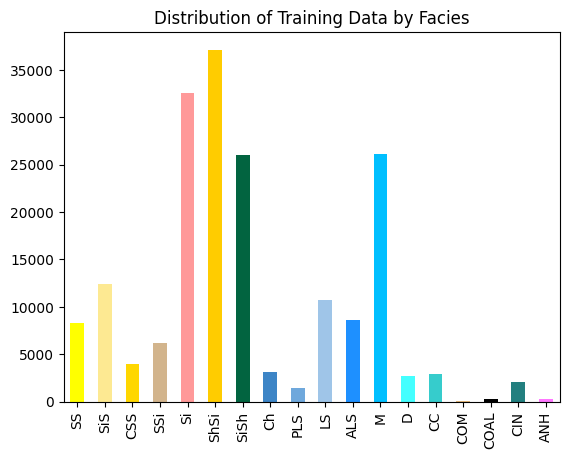

In [19]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [20]:
blind = training_data[training_data['WELL'] == '32/2-1']
training_data = training_data[training_data['WELL'] != '32/2-1']

In [21]:
blind = blind.reset_index(drop=True)
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,1068.706410,573.659927,87.325302,5,0.308900,0.470058,2.387500,0.464549,32/2-1,1201.265503,Si
1,1043.266940,567.605814,88.220482,5,0.306902,0.386091,2.357924,0.349771,32/2-1,1201.417847,Si
2,1045.191503,550.174595,90.253197,5,0.269500,0.359930,2.360800,0.310608,32/2-1,1201.570312,Si
3,1041.689019,530.339814,91.267090,5,0.261107,0.422116,2.374489,0.382396,32/2-1,1201.722656,Si
4,1046.242461,520.258081,87.683098,5,0.262900,0.484599,2.380900,0.435797,32/2-1,1201.875122,Si
...,...,...,...,...,...,...,...,...,...,...,...
236,1187.072187,597.621460,122.519119,6,0.166503,0.774858,2.527479,0.765090,32/2-1,1256.891480,ShSi
237,1186.660786,594.078595,120.415588,6,0.167599,0.779809,2.535693,0.770413,32/2-1,1257.043823,ShSi
238,1174.650379,589.132812,121.059982,6,0.176393,0.778644,2.540496,0.770749,32/2-1,1257.196289,ShSi
239,1196.792641,585.418683,123.795799,6,0.179398,0.763822,2.521915,0.760551,32/2-1,1257.348633,ShSi


In [22]:
FaciesLabels = blind['FaciesLabels']
FaciesLabels

0        Si
1        Si
2        Si
3        Si
4        Si
       ... 
236    ShSi
237    ShSi
238    ShSi
239    ShSi
240    ShSi
Name: FaciesLabels, Length: 241, dtype: object

In [23]:
training_data = training_data.reset_index(drop=True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914,ShSi
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502,ShSi
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846,ShSi
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189,ShSi
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533,ShSi
...,...,...,...,...,...,...,...,...,...,...,...
184473,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469,SS
184474,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812,SS
184475,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156,SS
184476,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500,SS


In [24]:
correct_facies_labels = training_data['Facies'].values
well_name = training_data['WELL']
feature_vectors = training_data.drop(['WELL', 'Depth','Facies','FaciesLabels'], axis=1)
depth = training_data['Depth']
feature_vectors.describe()

,Vp,Vs,GR,NPHI,RDEP,RHOB,RMED
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,1107.278161,555.299051,84.563754,2.046763,0.438948,2.444904,0.441194
std,350.298750,228.740372,42.337080,7.860809,0.455169,0.151253,0.456540
min,261.159283,97.222720,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,949.655221,431.246612,57.835450,0.206200,0.150549,2.359804,0.151370
50%,1122.713150,580.216174,80.334499,0.281700,0.394047,2.473686,0.403217
75%,1250.115674,677.912663,105.731672,0.353800,0.674934,2.557400,0.687660
max,5519.963395,2875.440293,1163.366455,61.007858,4.466433,3.217700,4.000000


In [25]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [26]:
# Perform MinMax scaler for the dataset

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(feature_vectors)

In [27]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['Vp','Vs','GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat['Well Name'] = well_name
df_scaled_feat['Facies'] = correct_facies_labels
df_scaled_feat

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10,Well Name,Facies
0,-0.693476,-0.795576,0.291623,-0.210559,-1.291284,0.233361,-1.353479,15/9-23,6
1,-0.698091,-0.822346,0.576630,-0.210623,-1.276200,0.378812,-1.348130,15/9-23,6
2,-0.706675,-0.867434,0.984200,-0.208499,-1.266348,0.186419,-1.301828,15/9-23,6
3,-0.727457,-0.885970,1.532130,-0.208511,-1.268311,0.240634,-1.265245,15/9-23,6
4,-0.787225,-0.924005,1.874290,-0.206183,-1.298705,0.171874,-1.337046,15/9-23,6
...,...,...,...,...,...,...,...,...,...
184473,-0.376378,1.012574,-1.273892,-0.239196,-1.142128,-0.731667,-1.192058,7/1-2 S,1
184474,-0.380138,1.012675,-1.226363,-0.237951,-1.110211,-0.522013,-1.155229,7/1-2 S,1
184475,-0.381329,1.012659,-1.127435,-0.237085,-1.062956,-0.434412,-1.102892,7/1-2 S,1
184476,-0.361963,1.012929,-1.011023,-0.238022,-1.044191,-0.559011,-1.078499,7/1-2 S,1


In [28]:
df_scaled_feat['Well Name'].unique()

['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern', '16/2-11 A Johan Sverdrup Appr', '16/2-16', ..., '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S']
Length: 42
Categories (43, object): ['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern', '16/2-11 A Johan Sverdrup Appr', ..., '35/9-7', '35/9-8', '35/9-9', '7/1-2 S']

In [29]:
scaled_features = df_scaled_feat

In [30]:
scaled_features['Depth'] = depth
scaled_features

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10,Well Name,Facies,Depth
0,-0.693476,-0.795576,0.291623,-0.210559,-1.291284,0.233361,-1.353479,15/9-23,6,2315.461914
1,-0.698091,-0.822346,0.576630,-0.210623,-1.276200,0.378812,-1.348130,15/9-23,6,2315.614502
2,-0.706675,-0.867434,0.984200,-0.208499,-1.266348,0.186419,-1.301828,15/9-23,6,2315.766846
3,-0.727457,-0.885970,1.532130,-0.208511,-1.268311,0.240634,-1.265245,15/9-23,6,2315.919189
4,-0.787225,-0.924005,1.874290,-0.206183,-1.298705,0.171874,-1.337046,15/9-23,6,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184473,-0.376378,1.012574,-1.273892,-0.239196,-1.142128,-0.731667,-1.192058,7/1-2 S,1,3159.605469
184474,-0.380138,1.012675,-1.226363,-0.237951,-1.110211,-0.522013,-1.155229,7/1-2 S,1,3159.757812
184475,-0.381329,1.012659,-1.127435,-0.237085,-1.062956,-0.434412,-1.102892,7/1-2 S,1,3159.910156
184476,-0.361963,1.012929,-1.011023,-0.238022,-1.044191,-0.559011,-1.078499,7/1-2 S,1,3160.062500


In [31]:
# blind = scaled_features[scaled_features['Well Name'] == '15/9-23']
# scaled_features = scaled_features[scaled_features['Well Name'] != '15/9-23']

In [32]:
# blind_take_FaciesLabels = training_data[training_data['WELL'] == '15/9-23']
# blind_take_FaciesLabels['FaciesLabels']
# FaciesLabels = blind_take_FaciesLabels['FaciesLabels']
# FaciesLabels

In [33]:
# scaled_features

In [34]:
# blind

In [35]:
correct_facies_labels = scaled_features['Facies']
scaled_features = scaled_features.drop(['Well Name', 'Facies','Depth'], axis = 1)

In [36]:
scaled_features

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,-0.693476,-0.795576,0.291623,-0.210559,-1.291284,0.233361,-1.353479
1,-0.698091,-0.822346,0.576630,-0.210623,-1.276200,0.378812,-1.348130
2,-0.706675,-0.867434,0.984200,-0.208499,-1.266348,0.186419,-1.301828
3,-0.727457,-0.885970,1.532130,-0.208511,-1.268311,0.240634,-1.265245
4,-0.787225,-0.924005,1.874290,-0.206183,-1.298705,0.171874,-1.337046
...,...,...,...,...,...,...,...
184473,-0.376378,1.012574,-1.273892,-0.239196,-1.142128,-0.731667,-1.192058
184474,-0.380138,1.012675,-1.226363,-0.237951,-1.110211,-0.522013,-1.155229
184475,-0.381329,1.012659,-1.127435,-0.237085,-1.062956,-0.434412,-1.102892
184476,-0.361963,1.012929,-1.011023,-0.238022,-1.044191,-0.559011,-1.078499


In [37]:
# scaled_features.min(axis=0)
# scaled_features

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=123)

In [39]:
x_train

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
141016,0.071021,0.285081,-0.408002,-0.230825,-0.307501,0.573851,-0.289109
151860,0.923454,0.840067,-0.040288,-0.227389,1.100575,0.722350,1.127608
130936,0.230825,0.147996,0.373871,-0.231003,0.103788,0.793891,0.195688
177697,0.154170,0.154826,-0.408120,-0.236549,0.171309,0.348396,0.154487
98056,-2.151474,-1.571506,-0.017256,-0.235883,0.136183,0.951360,0.119977
...,...,...,...,...,...,...,...
146449,1.394088,1.640469,-0.609946,-0.246357,2.351327,1.384216,2.414688
119906,0.406953,0.618062,0.267951,-0.216628,2.215028,0.466746,2.242542
17730,-0.265412,-0.154411,-0.834570,-0.226919,-0.557229,-0.789443,-0.489898
28030,1.078827,0.986738,-1.741324,-0.245801,-0.142419,0.891196,-0.129424


In [40]:
x_train_Vp          = x_train.Vp.to_numpy()
x_train_Vs          = x_train.Vs.to_numpy()
x_train_GR          = x_train.GR.to_numpy()
x_train_NPHI        = x_train.NPHI.to_numpy()
x_train_RDEP_log10  = x_train.RDEP_log10.to_numpy()
x_train_RHOB        = x_train.RHOB.to_numpy()
x_train_RMED_log10  = x_train.RMED_log10.to_numpy()

In [41]:
x_test_Vp          = x_test.Vp.to_numpy()
x_test_Vs          = x_test.Vs.to_numpy()
x_test_GR          = x_test.GR.to_numpy()
x_test_NPHI        = x_test.NPHI.to_numpy()
x_test_RDEP_log10  = x_test.RDEP_log10.to_numpy()
x_test_RHOB        = x_test.RHOB.to_numpy()
x_test_RMED_log10  = x_test.RMED_log10.to_numpy()

In [42]:
def make_train_matrix(n):
    i = 0
    test = np.ones((len(x_train_GR), 7, 1))
    while i <= n:
        x_train_ = x_train.iloc[[i]]
        x_train_ = x_train_.to_numpy()
        x_train_ = x_train_.reshape((7,1))
        test[i,:,:] = x_train_
        x_train_new = test 
        i = i + 1
    return x_train_new

In [43]:
def make_test_matrix(n):
    i = 0
    test = np.ones((len(x_test_GR), 7, 1))
    while i <= n:
        x_test_ = x_test.iloc[[i]]
        x_test_ = x_test_.to_numpy()
        x_test_ = x_test_.reshape((7,1))
        test[i,:,:] = x_test_
        x_test_new = test 
        i = i + 1
    return x_test_new

In [44]:
x_train_new = make_train_matrix(len(x_train_GR)-1)
x_train_new

array([[[ 0.07102111],
        [ 0.28508071],
        [-0.40800172],
        ...,
        [-0.30750063],
        [ 0.57385062],
        [-0.28910941]],

       [[ 0.92345405],
        [ 0.84006688],
        [-0.04028793],
        ...,
        [ 1.10057459],
        [ 0.72235044],
        [ 1.12760836]],

       [[ 0.2308253 ],
        [ 0.14799597],
        [ 0.37387102],
        ...,
        [ 0.10378823],
        [ 0.79389069],
        [ 0.19568759]],

       ...,

       [[-0.26541226],
        [-0.15441081],
        [-0.83456987],
        ...,
        [-0.55722942],
        [-0.78944323],
        [-0.48989781]],

       [[ 1.07882737],
        [ 0.9867383 ],
        [-1.741324  ],
        ...,
        [-0.14241921],
        [ 0.89119553],
        [-0.12942432]],

       [[-0.16170196],
        [-0.16947747],
        [ 0.11222458],
        ...,
        [-1.15113327],
        [-1.45851525],
        [-1.18594168]]])

In [45]:
x_test_new = make_test_matrix(len(x_test_GR)-1)
x_test_new

array([[[-0.42766151],
        [-0.43996129],
        [ 0.18252943],
        ...,
        [-0.4422635 ],
        [-0.1296099 ],
        [-0.28985655]],

       [[-0.45991152],
        [-0.72832345],
        [ 2.46844744],
        ...,
        [-0.53580095],
        [-1.09025593],
        [-0.66414246]],

       [[-1.19158029],
        [-1.02630462],
        [-0.77996894],
        ...,
        [-1.56224084],
        [-1.56694243],
        [-1.65827623]],

       ...,

       [[-0.20439167],
        [-0.25413256],
        [ 1.11778562],
        ...,
        [-0.1846212 ],
        [ 0.70211393],
        [-0.03151943]],

       [[ 0.74275983],
        [ 0.73760385],
        [-0.51835917],
        ...,
        [ 0.43992355],
        [ 1.49482914],
        [ 0.73473509]],

       [[ 0.23710195],
        [ 0.87722381],
        [-0.14856407],
        ...,
        [-0.19062395],
        [ 0.87335027],
        [-0.0625692 ]]])

In [46]:
np.info(x_train_new)

class:  ndarray
shape:  (147582, 7, 1)
strides:  (56, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x164ad00e040
byteorder:  little
byteswap:  False
type: float64


In [47]:
np.info(x_test_new)

class:  ndarray
shape:  (36896, 7, 1)
strides:  (56, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x164ac165040
byteorder:  little
byteswap:  False
type: float64


In [48]:
x_train = x_train_new
x_test = x_test_new
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [49]:
np.info(y_train)

class:  ndarray
shape:  (147582,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x164a8145dd0
byteorder:  little
byteswap:  False
type: int32


In [50]:
np.info(y_test)

class:  ndarray
shape:  (36896,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x164a882c0c0
byteorder:  little
byteswap:  False
type: int32


# AutoKeras for 1D CNN

In [51]:
from autokeras import ImageClassifier
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28), for MNIST
print(y_train.shape)  # (60000,), for MNIST
# print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(147582, 7, 1)
(147582,)


In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(147582, 7, 1)
(36896, 7, 1)
(147582,)
(36896,)


In [53]:
# # Initialize the image classifier.
# clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# # Feed the image classifier with training data.
# clf.fit(x_train, y_train, epochs=5)


# # Predict with the best model.
# predicted_y = clf.predict(x_test)
# print(predicted_y)


# # Evaluate the best model with testing data ss
# print(clf.evaluate(x_test, y_test))

In [54]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node2 = ak.ResNetBlock(version="v2")(output_node)
# output_node = ak.Merge()([output_node1, output_node2])
# output_node = ak.Merge()(output_node)
output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=10
)

# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=1)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data ss
print(clf.evaluate(x_test, y_test))

Trial 10 Complete [00h 00m 12s]
val_loss: 1.4045490026474

Best val_loss So Far: 1.1397558450698853
Total elapsed time: 00h 09m 45s
INFO:tensorflow:Oracle triggered exit
4612/4612 [==============================] - 19s 4ms/step - loss: 1.3450 - accuracy: 0.5302


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


1153/1153 [==============================] - 2s 2ms/step
[['11']
 ['7']
 ['5']
 ...
 ['7']
 ['5']
 ['5']]
1153/1153 [==============================] - 3s 2ms/step - loss: 1.0744 - accuracy: 0.6167
[1.074378252029419, 0.6166521906852722]


In [55]:
model = clf.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.s
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 7, 1)             0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 7, 1, 1)          0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 7, 1, 1)          3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 7, 1, 32)          320       
                                                             

In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
# The confusion matrix helps visualize the performance of the algorithm.
y_pred_AK = np.squeeze(np.array([predicted_y.astype(int)]))
cm = metrics.confusion_matrix(y_test, y_pred_AK)

# compute and print accuracy score
print('Model accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_AK)))

Model accuracy score is: 0.6167


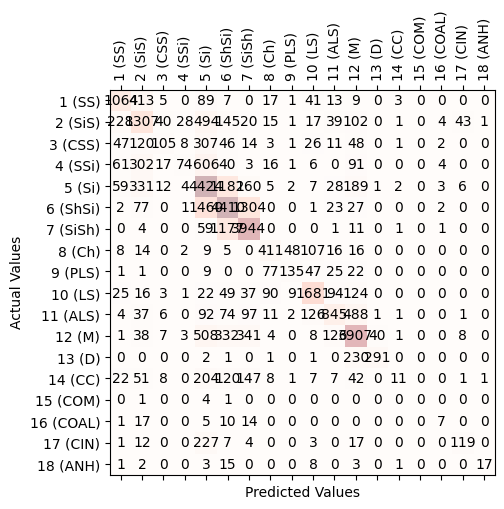

              precision    recall  f1-score   support

           1       0.70      0.64      0.67      1662
           2       0.48      0.53      0.50      2485
           3       0.52      0.14      0.22       739
           4       0.61      0.06      0.11      1221
           5       0.52      0.69      0.59      6415
           6       0.58      0.60      0.59      7307
           7       0.65      0.76      0.70      5198
           8       0.62      0.65      0.64       636
           9       0.67      0.43      0.52       317
          10       0.81      0.78      0.79      2151
          11       0.69      0.47      0.56      1785
          12       0.73      0.73      0.73      5324
          13       0.87      0.55      0.68       526
          14       0.50      0.02      0.03       630
          15       0.00      0.00      0.00         6
          16       0.30      0.13      0.18        54
          17       0.67      0.31      0.42       390
          18       0.89    

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
%matplotlib inline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_AK))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [58]:
blind['FaciesLabels'] = FaciesLabels
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels
0,1068.706410,573.659927,87.325302,5,0.308900,0.470058,2.387500,0.464549,32/2-1,1201.265503,Si
1,1043.266940,567.605814,88.220482,5,0.306902,0.386091,2.357924,0.349771,32/2-1,1201.417847,Si
2,1045.191503,550.174595,90.253197,5,0.269500,0.359930,2.360800,0.310608,32/2-1,1201.570312,Si
3,1041.689019,530.339814,91.267090,5,0.261107,0.422116,2.374489,0.382396,32/2-1,1201.722656,Si
4,1046.242461,520.258081,87.683098,5,0.262900,0.484599,2.380900,0.435797,32/2-1,1201.875122,Si
...,...,...,...,...,...,...,...,...,...,...,...
236,1187.072187,597.621460,122.519119,6,0.166503,0.774858,2.527479,0.765090,32/2-1,1256.891480,ShSi
237,1186.660786,594.078595,120.415588,6,0.167599,0.779809,2.535693,0.770413,32/2-1,1257.043823,ShSi
238,1174.650379,589.132812,121.059982,6,0.176393,0.778644,2.540496,0.770749,32/2-1,1257.196289,ShSi
239,1196.792641,585.418683,123.795799,6,0.179398,0.763822,2.521915,0.760551,32/2-1,1257.348633,ShSi


In [59]:
y_blind = blind['Facies'].values
well_features = blind.drop(['FaciesLabels', 'Facies', 'WELL', 'Depth'], axis=1)
# x_blind = well_features
x_blind = scaler.transform(well_features)

In [60]:
x_blind

array([[-0.11011131,  0.08026972,  0.06522782, ...,  0.06834637,
        -0.37952238,  0.05115761],
       [-0.18273372,  0.05380246,  0.08637198, ..., -0.11612646,
        -0.57506679, -0.20025146],
       [-0.17723965, -0.022403  ,  0.13438475, ..., -0.17360218,
        -0.55604877, -0.28603376],
       ...,
       [ 0.19232841,  0.14791378,  0.86204167, ...,  0.74630839,
         0.63200653,  0.7218558 ],
       [ 0.25553823,  0.13167642,  0.92666172, ...,  0.71374389,
         0.5091578 ,  0.69951968],
       [ 0.31356494,  0.15002032,  0.86410467, ...,  0.70573524,
         0.45753091,  0.68784932]])

In [61]:
# x_blind = x_blind.to_numpy()
y_pred = clf.predict(x_blind)
blind['Prediction'] = y_pred.astype(float)

8/8 [==============================] - 0s 2ms/step


In [62]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,FaciesLabels,Prediction
0,1068.706410,573.659927,87.325302,5,0.308900,0.470058,2.387500,0.464549,32/2-1,1201.265503,Si,6.0
1,1043.266940,567.605814,88.220482,5,0.306902,0.386091,2.357924,0.349771,32/2-1,1201.417847,Si,6.0
2,1045.191503,550.174595,90.253197,5,0.269500,0.359930,2.360800,0.310608,32/2-1,1201.570312,Si,6.0
3,1041.689019,530.339814,91.267090,5,0.261107,0.422116,2.374489,0.382396,32/2-1,1201.722656,Si,6.0
4,1046.242461,520.258081,87.683098,5,0.262900,0.484599,2.380900,0.435797,32/2-1,1201.875122,Si,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
236,1187.072187,597.621460,122.519119,6,0.166503,0.774858,2.527479,0.765090,32/2-1,1256.891480,ShSi,7.0
237,1186.660786,594.078595,120.415588,6,0.167599,0.779809,2.535693,0.770413,32/2-1,1257.043823,ShSi,7.0
238,1174.650379,589.132812,121.059982,6,0.176393,0.778644,2.540496,0.770749,32/2-1,1257.196289,ShSi,7.0
239,1196.792641,585.418683,123.795799,6,0.179398,0.763822,2.521915,0.760551,32/2-1,1257.348633,ShSi,7.0


In [63]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(9, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im2 = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([]); ax[6].set_xticklabels([])
    ax[7].set_xticklabels([]); ax[7].set_yticklabels([]); ax[8].set_xticklabels([]); ax[8].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

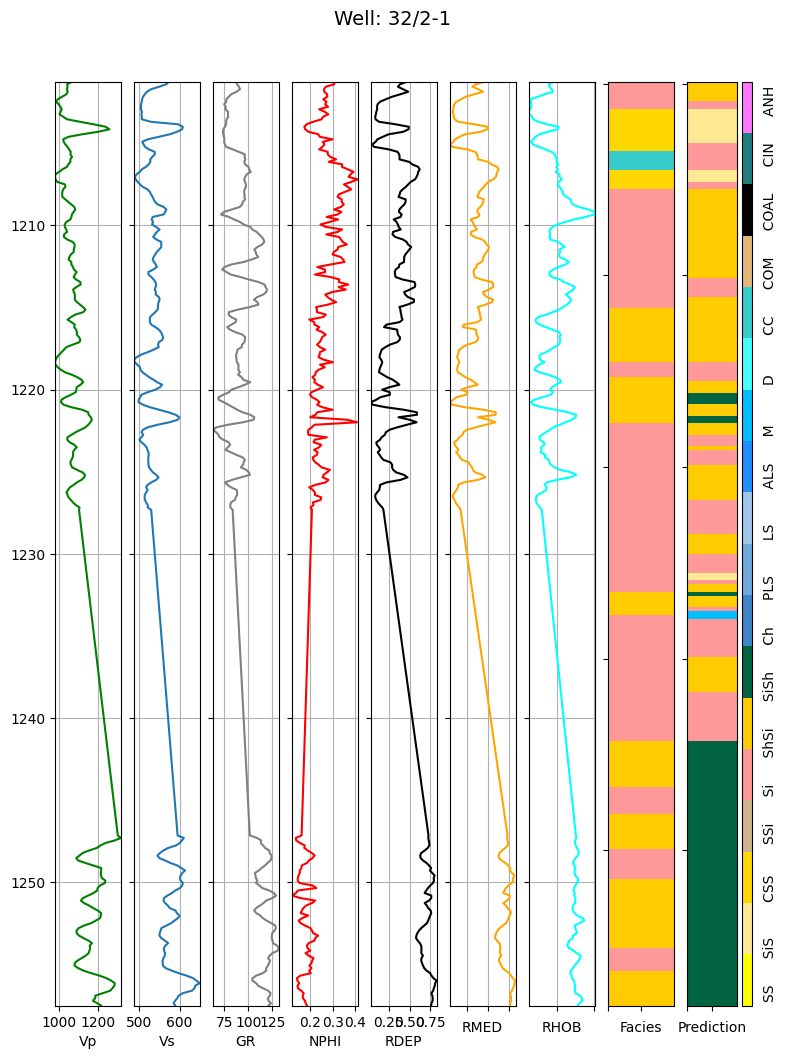

In [64]:
compare_facies_plot(blind, 'Prediction', facies_colors)

In [65]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction'])))

Blind test accuracy score is: 0.3278


In [67]:
blind_data_save = blind
blind_data_save.to_csv('well32_CNN2_facies.csv', index=False)